# 주제분석 (비지도학습)

In [ ]:
# 코랩에서  하는 경우는 이 코드로 데이터를 다운 받으면 됌
# !wget -c https://github.com/euphoris/datasets/raw/master/neurips.zip

In [3]:
import pandas as pd
df = pd.read_csv('neurips.zip')

In [4]:
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [5]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
cv = TfidfVectorizer(stop_words='english', max_features=2000)

In [8]:
x = cv.fit_transform(df.abstract)

In [9]:
words = cv.get_feature_names()

In [10]:
from sklearn.decomposition import TruncatedSVD

In [11]:
x.shape

(3920, 2000)

In [12]:
# 3920 개의 문서를 100개의 주제로 분류 즉 100차원으로 축소 
# n_components 를 100개로 나눌때 random_state으로 결과가 똑같게 나눔 
svd = TruncatedSVD(n_components=100, random_state=1234)

In [13]:
svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [14]:
# 차원과 단어의 관계 
svd.components_.shape

(100, 2000)

In [15]:
# 100개의 각각의 차원들 별로 2000개의 단어들과 어떤게 관련이 있는지를 나타냄 
svd.components_

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [16]:
# 단어목록에서 특정단어가 몇번째 있는지 index 메서드를 쓰면 볼수있다.
# 토픽이라는 단어는 1861번째에 위치
words.index('topic')

1861

In [17]:
word_idx = words.index('topic')

In [18]:
# 행은 100 다가져오고 열은 1861번째인 topic 단어의 열만 가져 오게됨 
svd.components_[:, word_idx]

array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
       -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
       -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
        1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
        1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
       -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
       -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
        3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
        1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
       -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
       -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
        1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
       -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
       -6.79298440e-02, -

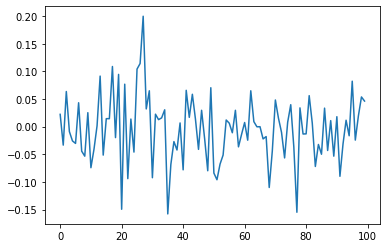

In [19]:
import matplotlib.pyplot as plt
plt.plot(svd.components_[:, word_idx]);
# 밑에 0.2를 넘는 27번째 주제가 topic 이라는 단어와 가장 관련된 주제라고 판단할수 있다. 

In [20]:
# 주제중에 27번 주제가 topic 이라는 단어와 관계가 강한 주제 임을 확인할수 있다. 
svd.components_[:, word_idx].argmax()

27

In [21]:
topic_idx = svd.components_[:, word_idx].argmax()

In [22]:
# 이 27번의 주제가 topic 이외의 다른 단어들과는 어떤 관련있는지를 알아보기 위해서 진행 
# 주제와 단어의 관련도를 나타내는 값을 loading 이라고 한다 
topic = pd.DataFrame({'words': words, 'loading': svd.components_[topic_idx]}) # [topic_idx, :] 열 다 가져 올때는 올때 뒤 : 는 생략가능 
topic.sort_values('loading').tail()
# 주제27이 증가하면 위 밑의 단어들이 동시에 증가한 다는 뜻  

,words,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


# 병렬 분석을 통한 차원 크기 결정 (차원의 결정)

In [23]:
import numpy as np 

In [24]:
x.shape

(3920, 2000)

In [25]:
nrow, ncol = x.shape

In [26]:
# 데이터를 다시 뽑는다. 
# 기존 tdm x에서 열마다(단어각각마다) 마구잡이로 뽑아서 새로운 데이터를 만듬 
def resample(a):
    return np.random.choice(a, size=nrow)

np.random.seed(2999)
d = np.apply_along_axis(resample, 0, x.A)

# d는 단어 빈도의 분포는 일치하지만 x에 있던 단어와 단어의 관계가 다 헝크러짐 
# d와 x를 주제 분석하고 결과를 비교해 보려고 한다. 

In [27]:
d.shape

(3920, 2000)

In [28]:
svd2 = TruncatedSVD(n_components=100, random_state=1234)
svd2.fit(d)

TruncatedSVD(n_components=100, random_state=1234)

In [29]:
# 100개의 차원으로 svd를 해서 차원을 축소했는데 
# 각각의 차원이 지니는 어떤 중요성 정도로 생각
svd2.singular_values_

array([13.00277865,  3.84071894,  3.77572738,  3.68401756,  3.64532372,
        3.55178333,  3.501594  ,  3.46689411,  3.45185393,  3.43513287,
        3.39630779,  3.38333036,  3.35447365,  3.33374546,  3.31246363,
        3.27766639,  3.25468905,  3.24300632,  3.22166306,  3.20489494,
        3.19483609,  3.17476351,  3.14775366,  3.13295956,  3.13147976,
        3.09523339,  3.07791121,  3.06870661,  3.05686939,  3.04757102,
        3.04190845,  3.0326146 ,  2.99674225,  2.98628026,  2.9754102 ,
        2.959524  ,  2.94798187,  2.94565898,  2.93501683,  2.92452354,
        2.91177556,  2.8985429 ,  2.88813474,  2.8716634 ,  2.86322439,
        2.84978814,  2.83562289,  2.82562812,  2.81592356,  2.80386208,
        2.79840561,  2.77881119,  2.77080156,  2.75827745,  2.74913613,
        2.74591915,  2.73704792,  2.73363507,  2.72812427,  2.7179886 ,
        2.71447777,  2.70860993,  2.69891145,  2.69589499,  2.68181001,
        2.67088707,  2.66330353,  2.65724649,  2.63990451,  2.63

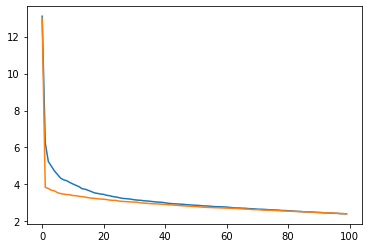

In [32]:
plt.plot(svd.singular_values_)
plt.plot(svd2.singular_values_)

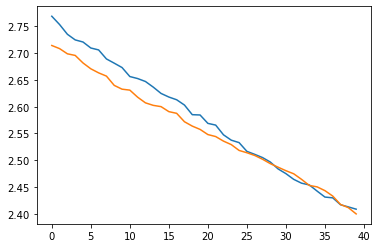

In [33]:
plt.plot(svd.singular_values_[60:])
plt.plot(svd2.singular_values_[60:])

In [34]:
# 망가진 데이터의 설명력과 똑같아지는 기존데이터의 차원을 찾아 그 뒷쪽은 배제하여 적당한 차원의 수를 선택할수 있다. 
svd.singular_values_ - svd2.singular_values_
# -로 변하는 시점을 찾으면 됨

array([ 1.02184545e-01,  2.40815353e+00,  1.46387541e+00,  1.29801274e+00,
        1.07919708e+00,  9.80976249e-01,  8.34164117e-01,  7.77079421e-01,
        7.45502972e-01,  6.64272745e-01,  6.25054724e-01,  5.62741331e-01,
        5.20163849e-01,  4.30513997e-01,  4.22431409e-01,  3.97282251e-01,
        3.55380212e-01,  2.96571356e-01,  2.89000222e-01,  2.72139574e-01,
        2.62931477e-01,  2.32747525e-01,  2.35963171e-01,  2.04960492e-01,
        1.86785976e-01,  1.84937104e-01,  1.66204666e-01,  1.61107994e-01,
        1.58736704e-01,  1.46655793e-01,  1.23402946e-01,  1.13850994e-01,
        1.40411430e-01,  1.26731148e-01,  1.26590041e-01,  1.26138602e-01,
        1.17895756e-01,  1.03059338e-01,  1.01597124e-01,  1.03583136e-01,
        8.96307540e-02,  7.69945466e-02,  7.03008451e-02,  7.59410016e-02,
        7.59317748e-02,  7.66670457e-02,  8.36953707e-02,  7.33101380e-02,
        7.51780990e-02,  7.30947991e-02,  6.73614827e-02,  7.98969124e-02,
        6.87201744e-02,  

In [37]:
np.argwhere(svd.singular_values_ - svd2.singular_values_ <= 0)[0]
# 89번째에서 데이터가 따라잡힌다. 
# 즉 우리가 필요한 차원의 수는 89 차원이라고 생각할수있다. 

array([89], dtype=int64)

In [39]:
svd.singular_values_.shape

(100,)

In [40]:
svd.components_.shape

(100, 2000)

In [ ]:
# 차원을 89 로 하여 다시 돌리면 된다 
# 그게 아니라면 89 이후로는 무시하면 된다. 

# 회전을 이용한 결과해석 

In [42]:
# 패키지 설치 
# !pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=e404b2eb7a147415f421a231ae426964b5310bbd32e23d52f9bbeb713da47f8c
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\8d\9e\4c\fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [43]:
from factor_analyzer import Rotator

In [44]:
rotator = Rotator()

In [46]:
# 행과 열을 뒤집어서 넣어줘야함 
rot = rotator.fit_transform(svd.components_.T)

In [48]:
# 트랜스포스 했음으로 다시 트랜스포스로 풀어줌
loading = rot.T 

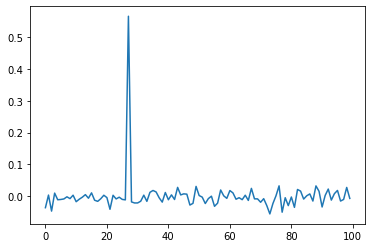

In [49]:
plt.plot(loading[:, word_idx]);

In [50]:
topic_idx = loading[:, word_idx].argmax()
topic_idx 

27

In [52]:
topic = pd.DataFrame({'words': words, 'loading': loading[topic_idx]}) # [topic_idx, :] 열 다 가져 올때는 올때 뒤 : 는 생략가능 
topic.sort_values('loading').tail(10)

,words,loading
1842,text,0.121777
999,latent,0.157819
520,dirichlet,0.187826
540,document,0.192213
1987,word,0.208114
1988,words,0.215588
1003,lda,0.224917
541,documents,0.225140
1862,topics,0.273106
1861,topic,0.566290


In [ ]:
# 이제 transfrom 하고 회전행렬을 다시 적용해보자 

In [54]:
doc_topics = svd.transform(x)

In [55]:
doc_topics.shape

(3920, 100)

In [56]:
# 회전 적용 
# 회전행렬을 행렬 곱셈해주면 회전된 결과가 됨 
doc_topics = doc_topics @ rotator.rotation_

In [57]:
# 문서별로 27번 토픽 주제를 얼마나 포함하는지 알수 있음
doc_topics[:, topic_idx]

array([ 0.04513653, -0.02398903,  0.02458688, ...,  0.01771896,
       -0.01505735,  0.03134085])

In [59]:
year_topic = pd.DataFrame({'year':df.year, 'topic':doc_topics[:, topic_idx]})

In [60]:
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.025189
2008,0.016155
2009,0.019187
2010,0.013317
2011,0.010558
2012,0.016707
2013,0.015346
2014,0.014001
2015,0.009028


# NMF 

In [61]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=89, random_state=1234)
doc_topics = nmf.fit_transform(x)

C:\Users\msi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [62]:
loading = nmf.components_

In [64]:
word_idx = words.index('topic')

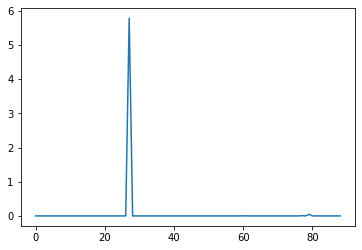

In [67]:
# NMF는 rotation 을 따로 안해줘도 됨 
plt.plot(loading[:,word_idx]);

In [69]:
topic_idx = loading[:,word_idx].argmax()

In [71]:
topic = pd.DataFrame({'word':words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
520,dirichlet,1.626153
541,documents,1.919543
1003,lda,2.077631
1862,topics,2.810796
1861,topic,5.789769


In [72]:
year_topic = pd.DataFrame({'year':df.year, 'topic':doc_topics[:, topic_idx]})
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.002231
2008,0.001294
2009,0.001785
2010,0.001217
2011,0.001194
2012,0.001699
2013,0.001276
2014,0.001205
2015,0.000814


# NMF 가 깔끔함 svd 보다는 NMF 로 하는 것을 추천 